# Importing libraries & dataset

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [207]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Preprocessing and EDA

In [177]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [178]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [179]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [180]:
dataset.duplicated().sum()

0

## droping the CustomerID column
the customers ID is not important for our analysis because it has high cardinality

In [181]:
dataset.drop('CustomerID', axis=1, inplace=True)

In [182]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Visualizing the data

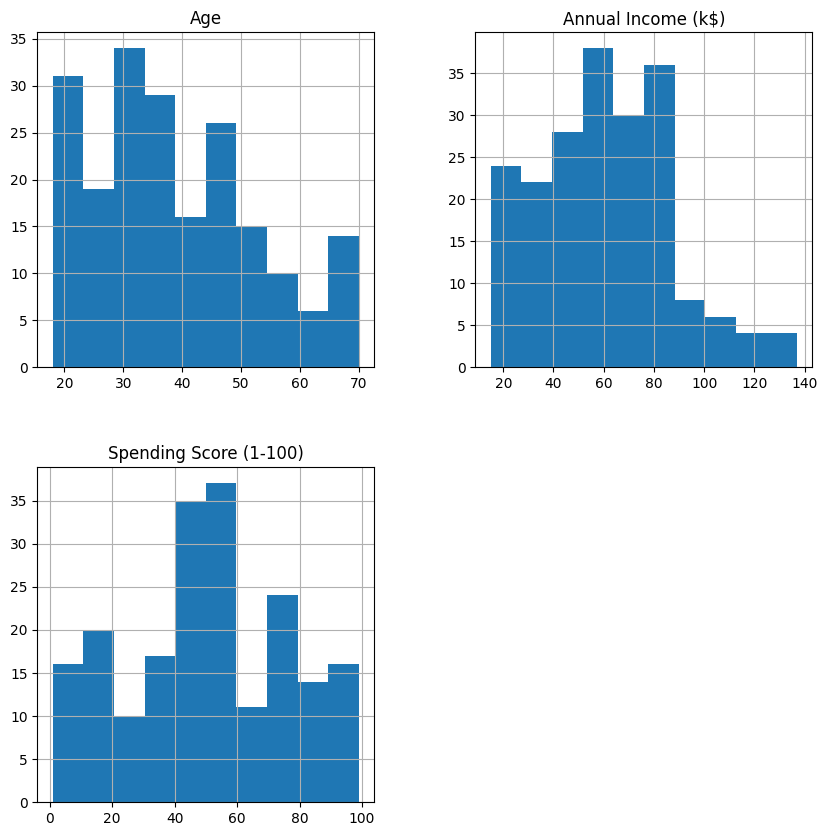

In [183]:
dataset.hist(figsize=(10,10));

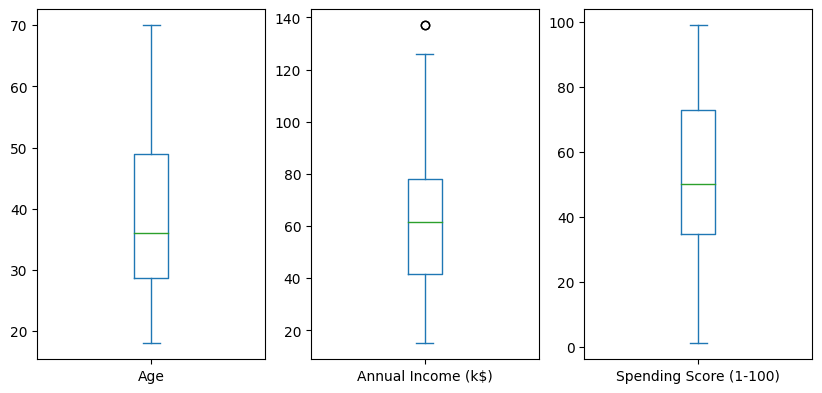

In [184]:
dataset.plot(kind='box', subplots=True, layout=(2,3), figsize=(10,10));

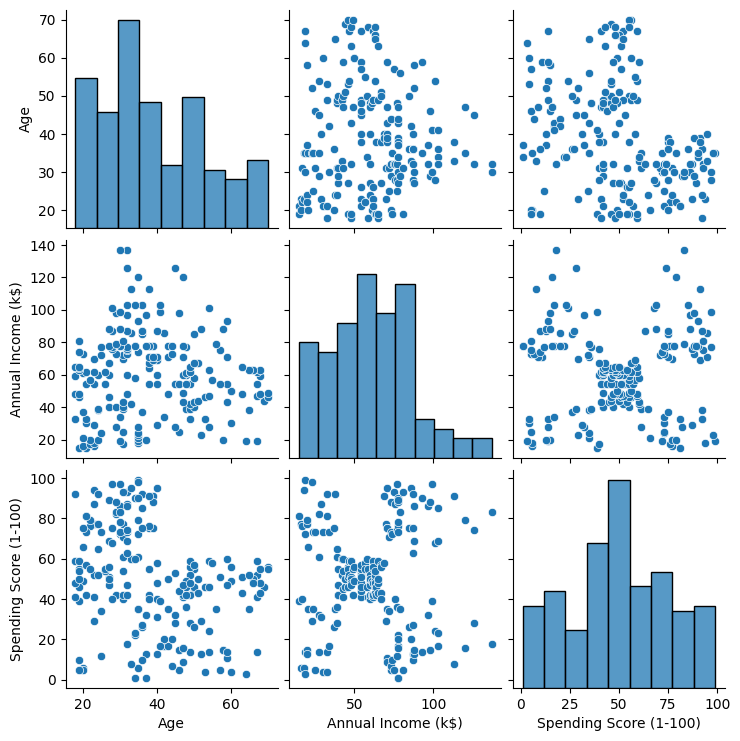

In [185]:
sns.pairplot(dataset);

/var/folders/92/q4x7f7_s5nbcqzvc06j_fyr00000gq/T/ipykernel_1915/3470133335.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



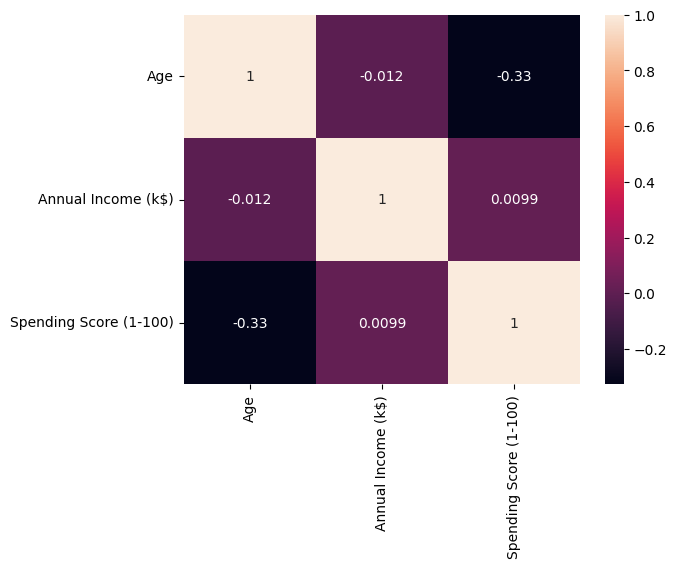

In [186]:
sns.heatmap(dataset.corr(), annot=True);

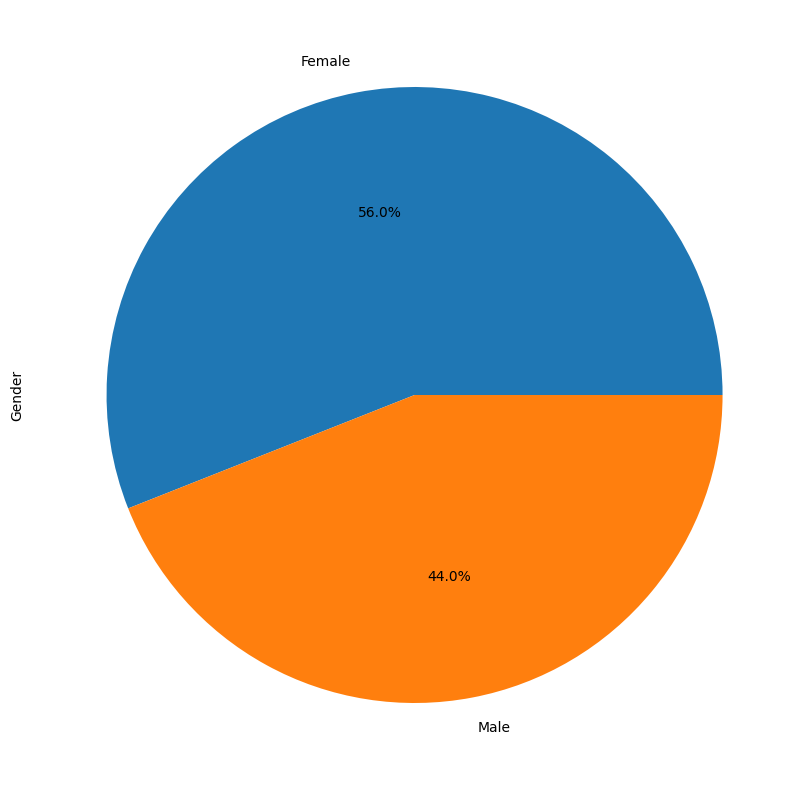

In [187]:
dataset['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10));

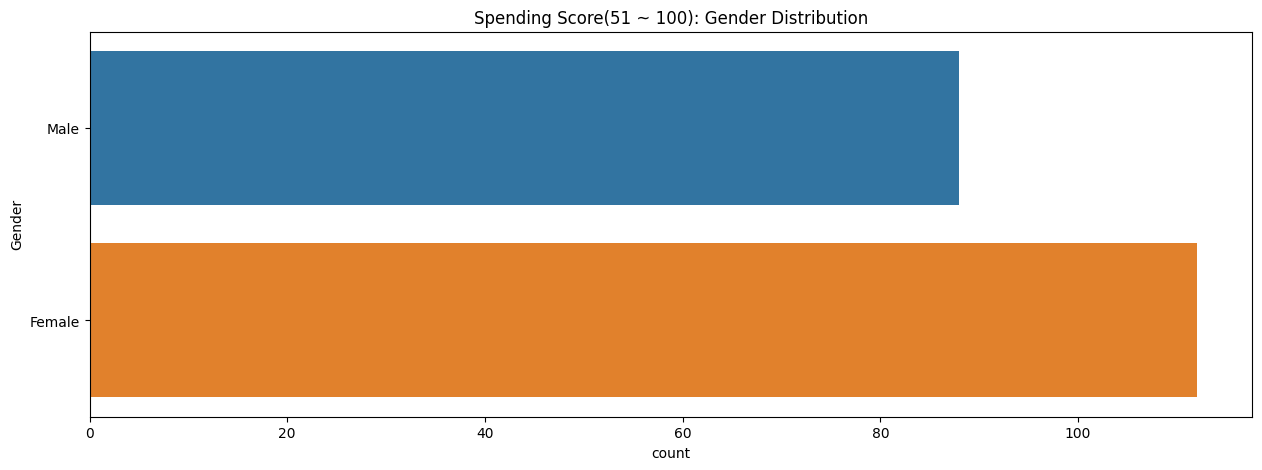

In [188]:
plt.figure(figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = dataset)
plt.title('Spending Score(51 ~ 100): Gender Distribution')
plt.show();

# model building

In [208]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [190]:
X = dataset.iloc[: , 2:]
print(f"X Shape {X.shape}")
X.head()


X Shape (200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [192]:
model = KMeans(random_state= 42)


In [193]:
n_clusters = range(2 , 13)
silhouette_scores = []
# Add `for` loop to train model and calculate silhouette score.
for k in n_clusters:
    model = KMeans(n_clusters= k , random_state= 42)
    #TRAIN MODEL
    model.fit(X)
    #CALCULATE SILHOUETTE SCORE
    silhouette_scores.append(silhouette_score(X , model.labels_))
print("Silhouette Scores:", silhouette_scores[:3])

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.

Silhouette Scores: [0.2968969162503008, 0.46761358158775435, 0.4931963109249047]


In [194]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = px.line(x= n_clusters , y= silhouette_scores , title= "K-Means Model: Silhouette Score vs Number of Clusters")
fig.update_layout(xaxis_title= 'Number of Clusters' , yaxis_title= 'Silhouette Score')
fig.show();

In [195]:
model.n_clusters = 5

In [196]:
model.fit(X)

/Library/Python/3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5, random_state=42)

In [204]:
label = model.labels_
centroids =model.cluster_centers_
print(f"Labels: {label[:5]}")

Labels: [4 2 4 2 4]


# Evaluating the model

In [209]:
#Evaluate the model
print(f"Model's inertia: {model.inertia_}")
print(f"Model's cluster centers: {centroids}")
print(f"Model's labels: {label}")


Model's inertia: 44448.45544793371
Model's cluster centers: [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]
Model's labels: [4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


# Communicating Results

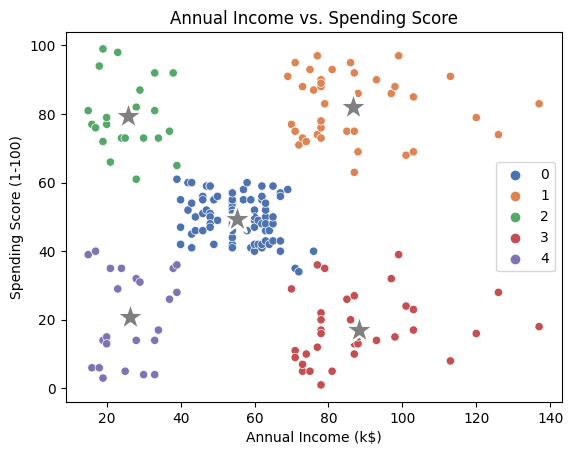

In [205]:
sns.scatterplot(x=dataset['Annual Income (k$)'] , y= dataset['Spending Score (1-100)'] ,
               hue=label,
               palette='deep')
sns.scatterplot(
    x= centroids[:,0],
    y= centroids[: ,1],
    color= 'gray',
    marker= '*',
    s= 500
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs. Spending Score");

In [206]:
xgb= X.groupby(model.labels_).mean()
fig = px.bar(
    xgb,
    barmode= 'group',
    title= "Annual income and spending score by Cluster"
)
fig.update_layout(xaxis_title= "Clusters" , yaxis_title= 'Value')

fig.show()